<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [3]:
df = pd.read_csv('states_edu.csv')

Chosen test: Math 4th Grade

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [94]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

<h2> Feature Selection </h2>

_Use this space to modify or create features_

Final feature list: LOCAL_REVENUE, INSTRUCTION_EXPEND_PER_STU

Feature selection justification: In my opinion, the local revenue for the community for the school system, how much the school system spends on education per student.

<h2> EDA </h2>

Visualization 1

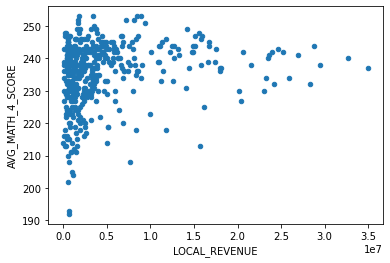

In [16]:
##basic scatter plot to see the correlation between the two
df.plot.scatter(x="LOCAL_REVENUE", y="AVG_MATH_4_SCORE")

There is a very low correlation between the local revenue and the Grades. As, the local revenue increases, there is an upward trend in Math grades, but the correlation is hard to see since there are so many schools with lower income that the variation in scores can be due to other factors.

Visualization 2

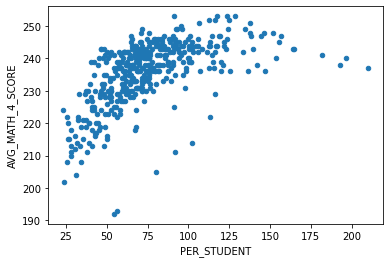

In [95]:
##do the same thing with this
df['PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_4']
df.plot.scatter(x='PER_STUDENT', y='AVG_MATH_4_SCORE')

There is a very similar pattern to the first graph, where we see a weak yet general trend upward in the average math score, and yet there are so many schools with lower income, the trend is harder to decifer. Yet even in the most clustered part of the graph, an upward trend is still discernable.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [78]:
from sklearn.model_selection import train_test_split

In [110]:
df = df.dropna()
X = df[['TOTAL_REVENUE','ENROLL_4','INSTRUCTION_EXPENDITURE','YEAR']]
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size = 0.25, random_state=0)

<h2> Prediction </h2>

Chosen ML task: REGRESSION

In [123]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [129]:
# create your model here
model = LinearRegression()

In [133]:
model.fit(X_train, y_train)

LinearRegression()

In [134]:

#now lets look at the r^2 value and the mean error and squared error

model.score(X_test, y_test)

LinearRegression()


0.06378495501460979

In [126]:
y_pred = model.predict(X_test)

In [127]:
# for classification:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

Text(0, 0.5, 'Average 4th Grade Math Score')

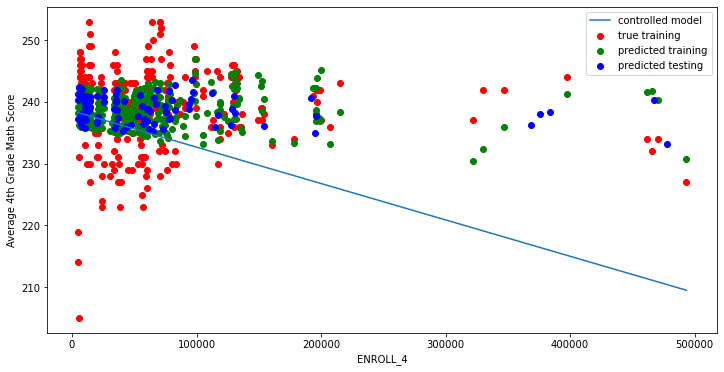

In [137]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'ENROLL_4'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average 4th Grade Math Score')

<h2> Summary </h2>

From the value of my r^2 value given above as well as my given visualization, I see that the thre is a very small correlation between. I initially thought that total revene and instruction spending would be good predictor of scores on something as non-specific as a fourth grade math test since I figured the more money brought in, and more money spend on education, the better the scores would be. Yet, the above results show that this was not correct. 